In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define maximum sea state parameters
Hs = 2.6  # significant wave height in meters
Tp = 11  # peak wave period in seconds
duration = 1000 # simulation duration in seconds
dt = 0.25  # time step in seconds

# Generate frequency array
N = int(duration / dt)
frequencies = np.fft.rfftfreq(N, d=dt)
omega = 2 * np.pi * frequencies

C:\Users\isahe\AppData\Local\Temp\ipykernel_16704\2971662869.py:8: RuntimeWarning: divide by zero encountered in divide
  S_pm = (alpha * g**2 / ((frequencies**5))) * np.exp(-1.25 * (fp / (frequencies))**(4))
C:\Users\isahe\AppData\Local\Temp\ipykernel_16704\2971662869.py:8: RuntimeWarning: invalid value encountered in multiply
  S_pm = (alpha * g**2 / ((frequencies**5))) * np.exp(-1.25 * (fp / (frequencies))**(4))


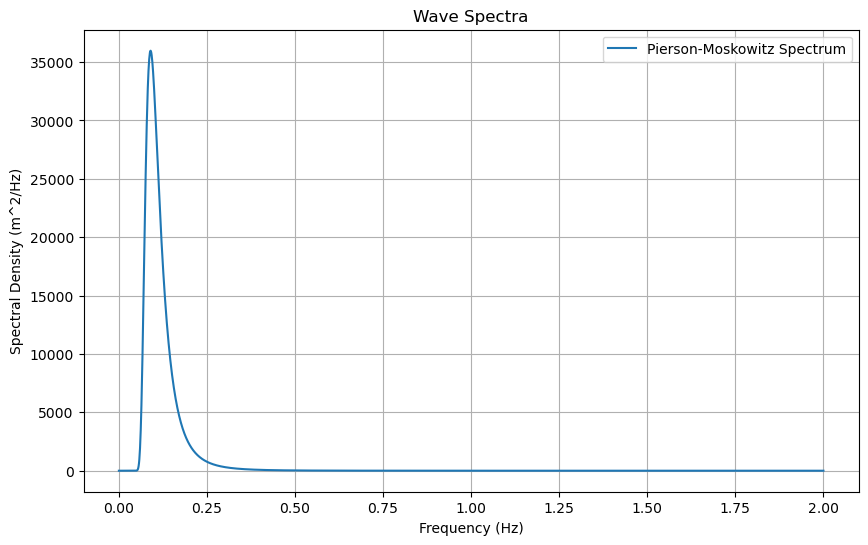

In [3]:
# Define parameters
g = 9.81  # Acceleration due to gravity in m/s^2

# Pierson-Moskowitz spectrum
def pierson_moskowitz(Hs, Tp, frequencies):
    fp = 1 / Tp
    alpha = 0.0081
    S_pm = (alpha * g**2 / ((frequencies**5))) * np.exp(-1.25 * (fp / (frequencies))**(4))
    return S_pm

# Calculate spectra
S_pm = pierson_moskowitz(Hs, Tp, frequencies)

# Plot spectra
plt.figure(figsize=(10, 6))
plt.plot(frequencies, S_pm, label='Pierson-Moskowitz Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral Density (m^2/Hz)')
plt.title('Wave Spectra')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
#New frequencies and omega according the spectra
frequencies = np.linspace(0.01, 0.4, 4000)  # Frequency range from 0.01 to 0.4 Hz
omega = 2 * np.pi * frequencies

# Generate wave spectrum
S = pierson_moskowitz(Hs, Tp, omega)

# Random phase angles
phases = np.random.uniform(0, 2 * np.pi, len(frequencies))

# Generate wave elevation time series using inverse Fourier transform
amplitudes = np.sqrt(2 * S * dt)
wave_elevation = np.fft.irfft(amplitudes * np.exp(1j * phases), n=N)

# Time array
time = np.arange(0, duration, dt)

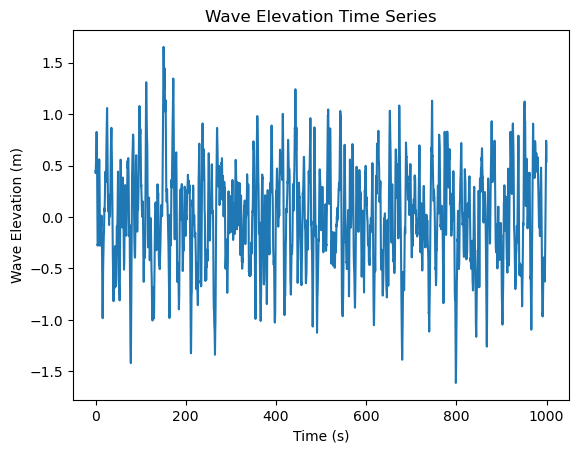

In [5]:
# Plot wave elevation time series
plt.plot(time, wave_elevation)
plt.xlabel('Time (s)')
plt.ylabel('Wave Elevation (m)')
plt.title('Wave Elevation Time Series')
plt.show()

In [6]:
# Calculate wave loading using Morison's equation
rho = 1025  # water density in kg/m^3
Cd = 2.0  # drag coefficient
Cm = 2.0  # inertia coefficient
D = 12.6  # diameter of the structure in meters

# Velocity and acceleration of the wave
wave_velocity = np.gradient(wave_elevation, dt)
wave_acceleration = np.gradient(wave_velocity, dt)

# Calculate wave force
drag_force = 0.5 * rho * Cd * D * wave_velocity * np.abs(wave_velocity)
inertia_force = rho * Cm * (np.pi * D**2 / 4) * wave_acceleration
wave_force = (drag_force + inertia_force)

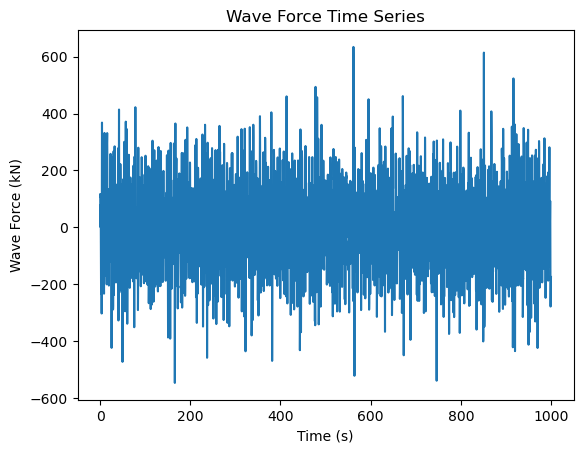

In [7]:
# Plot wave force time series
plt.plot(time, (wave_force)/1000)
plt.xlabel('Time (s)')
plt.ylabel('Wave Force (kN)')
plt.title('Wave Force Time Series')
plt.show()

In [8]:
# Define parameters
rho = 1025  # Water density in kg/m³
Cd = 2    # Drag coefficient
D = 12.6     # Diameter of the cylinder in meters
L = 4000    # Length of the cylinder in meters (submerged)
u_current = 1.2  # Current velocity in m/s

# Projected area perpendicular to the flow direction
A = D * L

# Calculate drag force due to current
F_drag = 0.5 * rho * Cd * D * u_current**2

print(f"Current Drag Force: {F_drag} N")

# To convert to kilonewtons (kN)
F_drag_kN = F_drag / 1000
print(f"Current Drag Force: {1.5*F_drag_kN} kN/m")

Current Drag Force: 18597.6 N
Current Drag Force: 27.8964 kN/m


In [9]:
# Save array to a text file
np.savetxt('wave_force.txt', wave_force)

# Save array to a CSV file
np.savetxt('wave_force1.csv', wave_force, delimiter='.')